<a href="https://colab.research.google.com/github/Frasierzzz/DPDM2024/blob/main/Classification_(dpdm24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML model construction and selection procedure

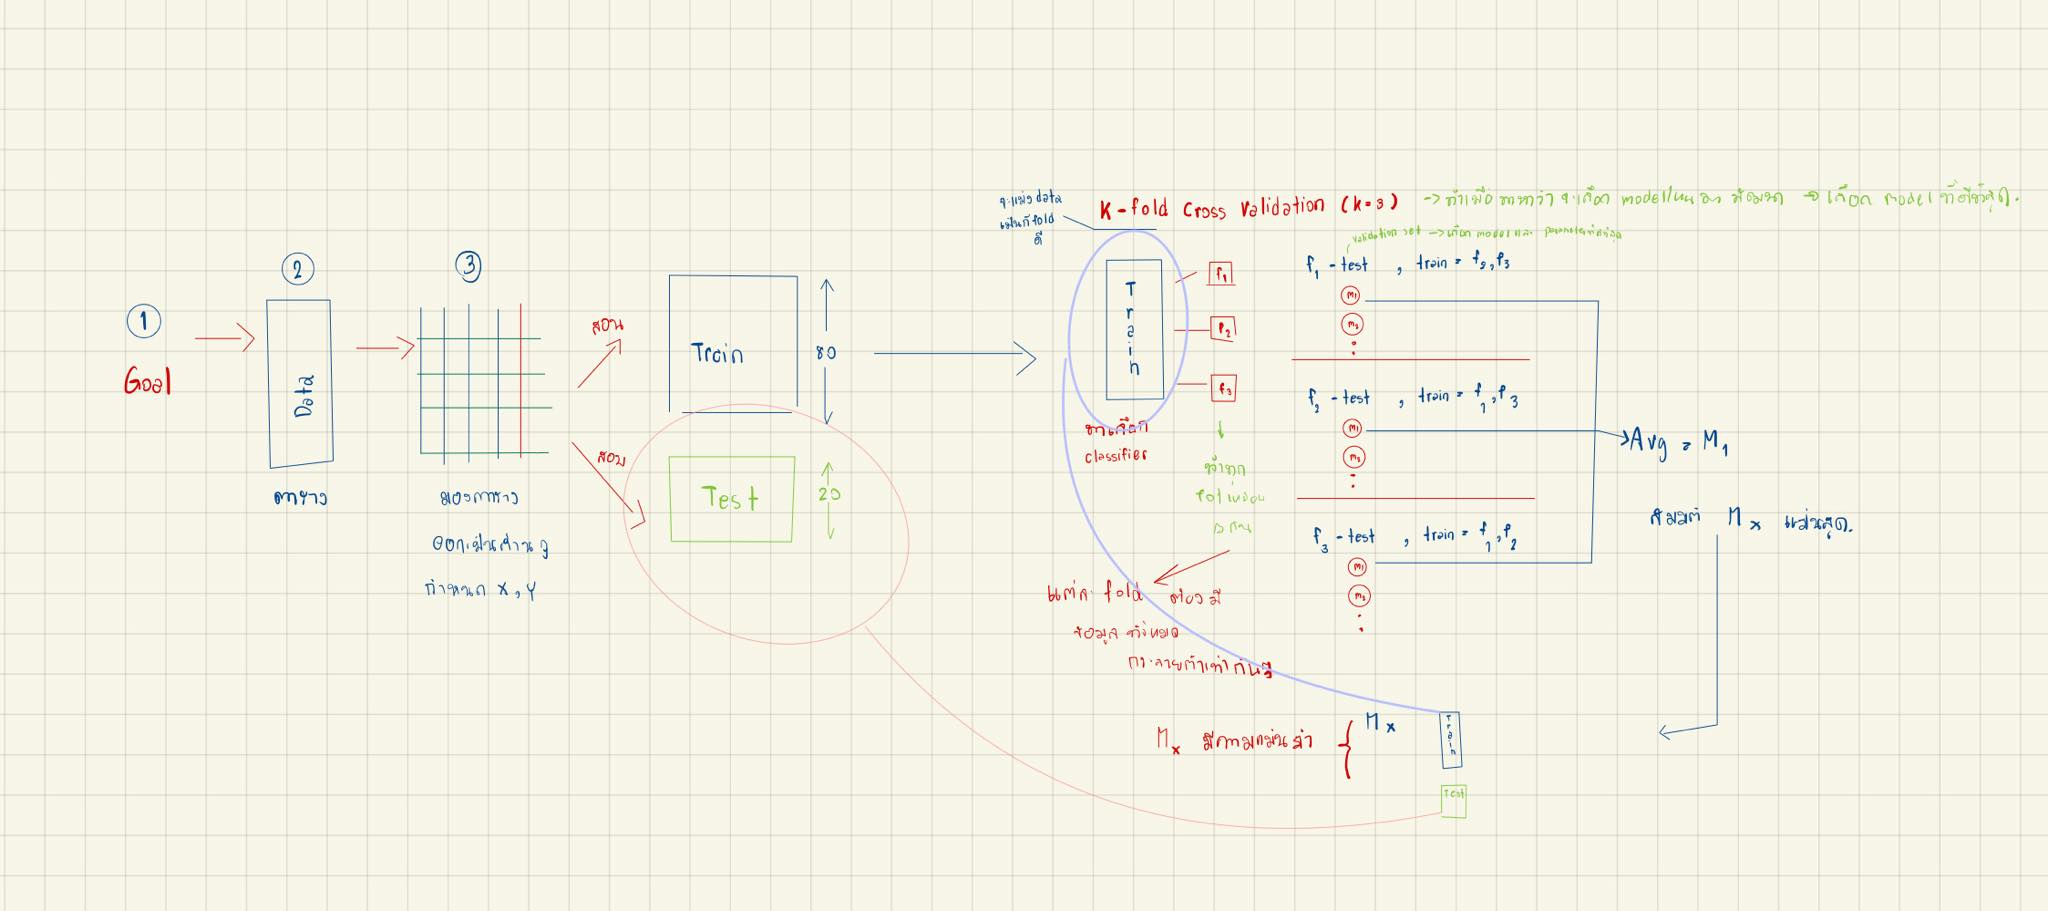

# Data

In [2]:
# prompt: โหลด kdd99 dataset โดยใช้ sklearn

from sklearn.datasets import fetch_kddcup99

# Load the KDD99 dataset
kdd99 = fetch_kddcup99()

# Access the data and target
X = kdd99.data
y = kdd99.target

# Print some information about the dataset
print("Data shape:", X.shape)
print("Target shape:", y.shape)


Data shape: (494021, 41)
Target shape: (494021,)


In [3]:
kdd99

{'data': array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        ...,
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object),
 'target': array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
        b'normal.'], dtype=object),
 'frame': None,
 'target_names': ['labels'],
 'feature_names': ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_s

## ตรวจการกระจายของ class

In [4]:
# prompt: count number of unique class in y

import numpy as np

unique_classes = np.unique(y)
num_unique_classes = len(unique_classes)

print("Number of unique classes:", num_unique_classes)


Number of unique classes: 23


In [5]:
# prompt: print all unique classes

print("Unique classes:", unique_classes)


Unique classes: [b'back.' b'buffer_overflow.' b'ftp_write.' b'guess_passwd.' b'imap.'
 b'ipsweep.' b'land.' b'loadmodule.' b'multihop.' b'neptune.' b'nmap.'
 b'normal.' b'perl.' b'phf.' b'pod.' b'portsweep.' b'rootkit.' b'satan.'
 b'smurf.' b'spy.' b'teardrop.' b'warezclient.' b'warezmaster.']


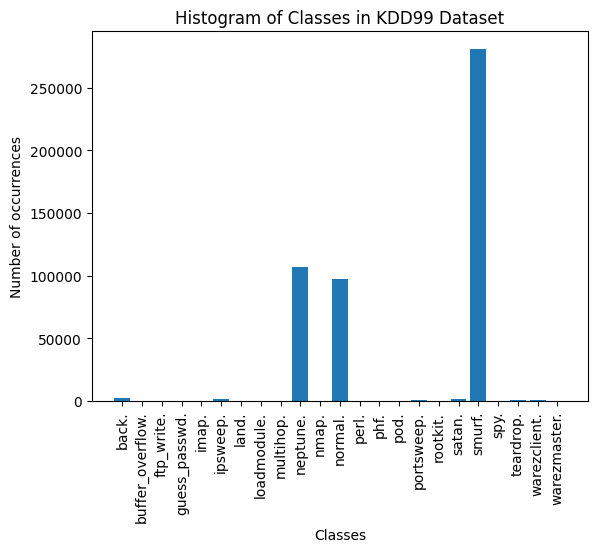

In [6]:
# prompt: plot histogram of the unique classes

import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = np.bincount([np.where(unique_classes == label)[0][0] for label in y])

# Create a histogram
plt.bar(unique_classes, class_counts)
plt.xlabel("Classes")
plt.ylabel("Number of occurrences")
plt.title("Histogram of Classes in KDD99 Dataset")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [7]:
y

array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
       b'normal.'], dtype=object)

## Goal : 3-classes classifier (normal, neptune, smurf)

In [8]:
# prompt: combine X and Y into pandas dataframe

import pandas as pd

# Assuming X and y are your data and target variables
df = pd.DataFrame(data=X, columns=kdd99.feature_names)
df['target'] = y

# Now df contains both your data and target variable in a pandas DataFrame
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [9]:
# prompt: force convert data type of the target column to string

df['target'] = df['target'].astype(str)

In [10]:
# prompt: extract 3 tables, one for target = normal, one for target neptune one for target smurf

normal_df = df[df['target'] == 'normal.']
neptune_df = df[df['target'] == 'neptune.']
smurf_df = df[df['target'] == 'smurf.']

print(normal_df.shape)
print(neptune_df.shape)
print(smurf_df.shape)

(97278, 42)
(107201, 42)
(280790, 42)


# Train & Test split

10% as a test

In [11]:
# prompt: sampling 10% from each tables (normal_df,neptune_df,smurf_df) and concatenate them in to test dataframe and concatenate the rest into training dataframe

from sklearn.model_selection import train_test_split

# Sample 10% from each DataFrame
normal_train_df, normal_test_df = train_test_split(normal_df, test_size=0.1, random_state=42)
neptune_train_df, neptune_test_df = train_test_split(neptune_df, test_size=0.1, random_state=42)
smurf_train_df, smurf_test_df = train_test_split(smurf_df, test_size=0.1, random_state=42)

# Concatenate test DataFrames
test_df = pd.concat([normal_test_df, neptune_test_df, smurf_test_df])

# Concatenate train DataFrames
train_df = pd.concat([normal_train_df, neptune_train_df, smurf_train_df])


In [12]:
normal_train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
87971,0,b'tcp',b'http',b'SF',322,7256,0,0,0,0,...,255,1.0,0.0,0.03,0.02,0.0,0.0,0.0,0.0,normal.
31908,0,b'udp',b'domain_u',b'SF',45,133,0,0,0,0,...,89,0.65,0.02,0.01,0.0,0.0,0.0,0.0,0.0,normal.
26943,0,b'tcp',b'http',b'SF',218,1653,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
344095,0,b'udp',b'domain_u',b'SF',33,0,0,0,0,0,...,11,0.09,0.04,0.09,0.0,0.0,0.0,0.0,0.0,normal.
85948,0,b'tcp',b'http',b'SF',319,410,0,0,0,0,...,255,1.0,0.0,0.04,0.01,0.0,0.0,0.0,0.0,normal.


In [13]:
neptune_train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
468684,0,b'tcp',b'private',b'REJ',0,0,0,0,0,0,...,3,0.01,0.08,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
386768,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,15,0.06,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
479127,0,b'tcp',b'private',b'REJ',0,0,0,0,0,0,...,3,0.01,0.08,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
468776,0,b'tcp',b'private',b'REJ',0,0,0,0,0,0,...,3,0.01,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
358267,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,15,0.06,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.


In [14]:
smurf_train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
414544,0,b'icmp',b'ecr_i',b'SF',520,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
240179,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
165580,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
230241,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
413069,0,b'icmp',b'ecr_i',b'SF',520,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


# Cross validation

In [15]:
test_df.shape

(48528, 42)

In [16]:
train_df.shape

(436741, 42)

# HW 3 แบ่ง fold โดยการสร้าง column ใหม่

## 3-fold cross validation

In [17]:
import pandas as pd

In [18]:
print(normal_train_df.shape[0])
print(neptune_train_df.shape[0])
print(smurf_train_df.shape[0])

87550
96480
252711


In [19]:
num_of_fold = 3

In [20]:
unique_classes_train = train_df['target'].unique()
print(unique_classes_train)

['normal.' 'neptune.' 'smurf.']


In [21]:
# โคลนตาราง พร้อมสร้างคอลัมน์ใหม่ชื่อ fold โดยเอามาต่อท้ายคอลัมน์
new_df = train_df.copy()
new_df['fold'] = -1

In [22]:
# รันบน unique_classes_train
for class_label in unique_classes_train:
  # เอา index ของ class ที่รันมา
  class_index = new_df[new_df['target'] == class_label].index.tolist()
  # สลับตำแหน่ง index
  np.random.shuffle(class_index)
  # แบ่งออกเป็น 3 fold ด้วยมือ!
  fold_size = len(class_index) // num_of_fold
  fold_1_index = class_index[:fold_size]
  fold_2_index = class_index[fold_size:2 * fold_size]
  fold_3_index = class_index[2 * fold_size:]

  new_df.loc[fold_1_index, 'fold'] = 0
  new_df.loc[fold_2_index, 'fold'] = 1
  new_df.loc[fold_3_index, 'fold'] = 2

In [23]:
new_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,fold
87971,0,b'tcp',b'http',b'SF',322,7256,0,0,0,0,...,1.0,0.0,0.03,0.02,0.0,0.0,0.0,0.0,normal.,2
31908,0,b'udp',b'domain_u',b'SF',45,133,0,0,0,0,...,0.65,0.02,0.01,0.0,0.0,0.0,0.0,0.0,normal.,1
26943,0,b'tcp',b'http',b'SF',218,1653,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.,1
344095,0,b'udp',b'domain_u',b'SF',33,0,0,0,0,0,...,0.09,0.04,0.09,0.0,0.0,0.0,0.0,0.0,normal.,0
85948,0,b'tcp',b'http',b'SF',319,410,0,0,0,0,...,1.0,0.0,0.04,0.01,0.0,0.0,0.0,0.0,normal.,2


In [24]:
new_df.groupby('fold')['target'].value_counts() # จำนวน class ในแต่ละ fold

fold  target  
0     smurf.      84237
      neptune.    32160
      normal.     29183
1     smurf.      84237
      neptune.    32160
      normal.     29183
2     smurf.      84237
      neptune.    32160
      normal.     29184
Name: count, dtype: int64

In [25]:
new_df.groupby('fold')['target'].count() # จำนวน class ในแต่ละ fold

,target
fold,
0,145580
1,145580
2,145581


# Other solution

In [26]:
# prompt: สร้าง list ที่มีค่า 1,2,3 ที่วนซ้ำจนมีสมาชิกเท่ากับขนาดของ df_train

fold_list = []
for i in range(new_df.shape[0]):
  fold_list.append((i % 3))

new_df['fold'] = fold_list
new_df.groupby('fold')['target'].value_counts() # จำนวน class ในแต่ละ fold

fold  target  
0     smurf.      84237
      neptune.    32160
      normal.     29184
1     smurf.      84237
      neptune.    32160
      normal.     29183
2     smurf.      84237
      neptune.    32160
      normal.     29183
Name: count, dtype: int64

# Training

Model code's mold

In [27]:
# 1. Import model package
from sklearn import tree

# 2. Define model spec
TreeX_foldX = tree.decisionTreeClassifier(max_dept=5)

# 3. Train model
X = dummyX
y = dummyY
TreeX_foldX.fit(X,Y) # X is record & Y is answer to train

# 4. Predict-Evaluate
from sklearn.metrics import classification_report
Y_val_hat = TreeX_foldX.predict(X_val)

print(classification_report(Y_val, Y_val_hat))

AttributeError: module 'sklearn.tree' has no attribute 'decisionTreeClassifier'

#HW4 หาต้นไม้ที่ดีที่สุดจาก 2 ต้นแล้ว report test set accuracy


In [71]:
new_df2 = new_df.copy()

In [72]:
new_df2.shape

(436741, 43)

In [73]:
from sklearn.preprocessing import LabelEncoder

# สมมติว่ามีคอลัมน์ที่เป็น categorical (string) เช่น 'protocol_type'
for col in new_df2.columns:
    if new_df2[col].dtype == 'object':  # ตรวจสอบว่าคอลัมน์นั้นเป็น string หรือไม่
        le = LabelEncoder()
        new_df2[col] = le.fit_transform(new_df2[col])  # แปลงค่า string เป็นตัวเลข

In [74]:
# Split data into training and validation sets for the current fold
train_df_fold1 = new_df2[new_df2['fold'] != 0]
val_df_fold1 = new_df2[new_df2['fold'] == 0]

train_df_fold2 = new_df2[new_df2['fold'] != 1]
val_df_fold2 = new_df2[new_df2['fold'] == 1]

train_df_fold3 = new_df2[new_df2['fold'] != 2]
val_df_fold3 = new_df2[new_df2['fold'] == 2]

## Model แรก

In [48]:
# 1. Import model package
from sklearn import tree

### Test fold 1

In [179]:
# 2. Define model spec
Tree1_fold1 = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=14)

In [180]:
# 3. Train model
X_train1 = train_df_fold1.drop(['target', 'fold'], axis=1)
Y_train1 = train_df_fold1['target']
X_val1 = val_df_fold1.drop(['target', 'fold'], axis=1)
Y_val1 = val_df_fold1['target']
Tree1_fold1.fit(X_train1,Y_train1) # X is record & Y is answer to train

# 4. Predict-Evaluate
from sklearn.metrics import classification_report, accuracy_score
Y_val_hat1 = Tree1_fold1.predict(X_val1)
accuracy_fold1 = accuracy_score(Y_val1, Y_val_hat1)

print(accuracy_fold1)
print(classification_report(Y_val1, Y_val_hat1))

0.9999175716611372
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29184
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145581
   macro avg       1.00      1.00      1.00    145581
weighted avg       1.00      1.00      1.00    145581



[Text(0.5982142857142857, 0.9166666666666666, 'x[23] <= 306.5\ngini = 0.576\nsamples = 291160\nvalue = [64320, 58366, 168474]'),
 Text(0.375, 0.75, 'x[28] <= 32.5\ngini = 0.5\nsamples = 122861\nvalue = [64320, 58350, 191]'),
 Text(0.48660714285714285, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'x[4] <= 2.0\ngini = 0.008\nsamples = 63995\nvalue = [63729, 266, 0]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 63729\nvalue = [63729, 0, 0]'),
 Text(0.21428571428571427, 0.4166666666666667, 'gini = 0.0\nsamples = 266\nvalue = [0, 266, 0]'),
 Text(0.6071428571428571, 0.5833333333333334, 'x[37] <= 91.5\ngini = 0.026\nsamples = 58866\nvalue = [591, 58084, 191]'),
 Text(0.35714285714285715, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.007\nsamples = 58276\nvalue = [11, 58074, 191]'),
 Text(0.21428571428571427, 0.25, 'x[4] <= 326.0\ngini = 0.328\nsamples = 924\nvalue = [0, 733, 191]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini

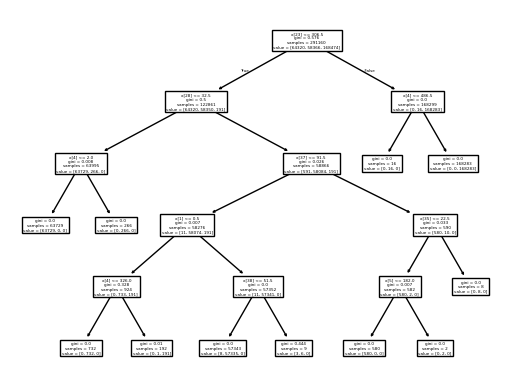

In [181]:
tree.plot_tree(Tree1_fold1)

### Test fold 2

In [182]:
# 2. Define model spec
Tree1_fold2 = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=14)

In [183]:
# 3. Train model
X_train2 = train_df_fold2.drop(['target', 'fold'], axis=1)
Y_train2 = train_df_fold2['target']
X_val2 = val_df_fold2.drop(['target', 'fold'], axis=1)
Y_val2 = val_df_fold2['target']
Tree1_fold2.fit(X_train2,Y_train2) # X is record & Y is answer to train

# 4. Predict-Evaluate
from sklearn.metrics import classification_report, accuracy_score
Y_val_hat2 = Tree1_fold2.predict(X_val2)
accuracy_fold2 = accuracy_score(Y_val2, Y_val_hat2)

print(accuracy_fold2)
print(classification_report(Y_val2, Y_val_hat2))

0.9999381783211979
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29183
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145580
   macro avg       1.00      1.00      1.00    145580
weighted avg       1.00      1.00      1.00    145580



### Test fold 3

In [184]:
# 2. Define model spec
Tree1_fold3 = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=14)

In [185]:
# 3. Train model
X_train3 = train_df_fold3.drop(['target', 'fold'], axis=1)
Y_train3 = train_df_fold3['target']
X_val3 = val_df_fold3.drop(['target', 'fold'], axis=1)
Y_val3 = val_df_fold3['target']
Tree1_fold3.fit(X_train3,Y_train3) # X is record & Y is answer to train

# 4. Predict-Evaluate
from sklearn.metrics import classification_report, accuracy_score
Y_val_hat3 = Tree1_fold3.predict(X_val3)
accuracy_fold3 = accuracy_score(Y_val3, Y_val_hat3)

print(accuracy_fold3)
print(classification_report(Y_val3, Y_val_hat3))

0.9999381783211979
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29183
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145580
   macro avg       1.00      1.00      1.00    145580
weighted avg       1.00      1.00      1.00    145580



### Overall

In [186]:
mean_accuracy_Tree1 = (accuracy_fold1 + accuracy_fold2 + accuracy_fold3) / 3

print(f"Accuracy of Tree1_fold1: {accuracy_fold1}")
print(f"Accuracy of Tree1_fold2: {accuracy_fold2}")
print(f"Accuracy of Tree1_fold3: {accuracy_fold3}")
print(f"Mean Accuracy: {mean_accuracy_Tree1}")

Accuracy of Tree1_fold1: 0.9999175716611372
Accuracy of Tree1_fold2: 0.9999381783211979
Accuracy of Tree1_fold3: 0.9999381783211979
Mean Accuracy: 0.999931309434511


## Model สอง

In [ ]:
# 1. Import model package
from sklearn import tree

### Test fold 1

In [163]:
# 2. Define model spec
Tree2_fold1 = tree.DecisionTreeClassifier(max_depth=8, min_samples_split=2, random_state=14)

In [164]:
# 3. Train model
X_train1 = train_df_fold1.drop(['target', 'fold'], axis=1)
Y_train1 = train_df_fold1['target']
X_val1 = val_df_fold1.drop(['target', 'fold'], axis=1)
Y_val1 = val_df_fold1['target']
Tree2_fold1.fit(X_train1,Y_train1) # X is record & Y is answer to train

# 4. Predict-Evaluate
from sklearn.metrics import classification_report, accuracy_score
Y_val_hat1 = Tree2_fold1.predict(X_val1)
accuracy_fold1 = accuracy_score(Y_val1, Y_val_hat1)

print(accuracy_fold1)
print(classification_report(Y_val1, Y_val_hat1))

0.99995191680233
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29184
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145581
   macro avg       1.00      1.00      1.00    145581
weighted avg       1.00      1.00      1.00    145581



0.99995191680233

[Text(0.58203125, 0.9444444444444444, 'x[23] <= 306.5\ngini = 0.576\nsamples = 291160\nvalue = [64320, 58366, 168474]'),
 Text(0.3984375, 0.8333333333333334, 'x[28] <= 32.5\ngini = 0.5\nsamples = 122861\nvalue = [64320, 58350, 191]'),
 Text(0.490234375, 0.8888888888888888, 'True  '),
 Text(0.18125, 0.7222222222222222, 'x[4] <= 2.0\ngini = 0.008\nsamples = 63995\nvalue = [63729, 266, 0]'),
 Text(0.13125, 0.6111111111111112, 'gini = 0.0\nsamples = 63729\nvalue = [63729, 0, 0]'),
 Text(0.23125, 0.6111111111111112, 'gini = 0.0\nsamples = 266\nvalue = [0, 266, 0]'),
 Text(0.615625, 0.7222222222222222, 'x[37] <= 91.5\ngini = 0.026\nsamples = 58866\nvalue = [591, 58084, 191]'),
 Text(0.33125, 0.6111111111111112, 'x[1] <= 0.5\ngini = 0.007\nsamples = 58276\nvalue = [11, 58074, 191]'),
 Text(0.1, 0.5, 'x[4] <= 326.0\ngini = 0.328\nsamples = 924\nvalue = [0, 733, 191]'),
 Text(0.05, 0.3888888888888889, 'gini = 0.0\nsamples = 732\nvalue = [0, 732, 0]'),
 Text(0.15, 0.3888888888888889, 'x[32] <= 2

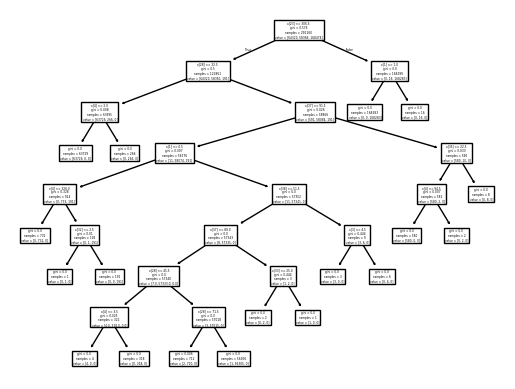

In [165]:
tree.plot_tree(Tree2_fold1)

### Test fold 2

In [166]:
# 2. Define model spec
Tree2_fold2 = tree.DecisionTreeClassifier(max_depth=8, min_samples_split=2, random_state=14)

In [168]:
# 3. Train model
X_train2 = train_df_fold2.drop(['target', 'fold'], axis=1)
Y_train2 = train_df_fold2['target']
X_val2 = val_df_fold2.drop(['target', 'fold'], axis=1)
Y_val2 = val_df_fold2['target']
Tree2_fold2.fit(X_train2,Y_train2) # X is record & Y is answer to train

# 4. Predict-Evaluate
from sklearn.metrics import classification_report, accuracy_score
Y_val_hat2 = Tree2_fold2.predict(X_val2)
accuracy_fold2 = accuracy_score(Y_val2, Y_val_hat2)

print(accuracy_fold2)
print(classification_report(Y_val2, Y_val_hat2))

0.9999587855474653
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29183
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145580
   macro avg       1.00      1.00      1.00    145580
weighted avg       1.00      1.00      1.00    145580



### Test fold 3

In [175]:
# 2. Define model spec
Tree2_fold3 = tree.DecisionTreeClassifier(max_depth=8, min_samples_split=2, random_state=14)

In [176]:
# 3. Train model
X_train3 = train_df_fold3.drop(['target', 'fold'], axis=1)
Y_train3 = train_df_fold3['target']
X_val3 = val_df_fold3.drop(['target', 'fold'], axis=1)
Y_val3 = val_df_fold3['target']
Tree2_fold3.fit(X_train3,Y_train3) # X is record & Y is answer to train

# 4. Predict-Evaluate
from sklearn.metrics import classification_report, accuracy_score
Y_val_hat3 = Tree2_fold3.predict(X_val3)
accuracy_fold3 = accuracy_score(Y_val3, Y_val_hat3)

print(accuracy_fold3)
print(classification_report(Y_val3, Y_val_hat3))

0.9999862618491551
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29183
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145580
   macro avg       1.00      1.00      1.00    145580
weighted avg       1.00      1.00      1.00    145580



### Overall

In [178]:
mean_accuracy_Tree2 = (accuracy_fold1 + accuracy_fold2 + accuracy_fold3) / 3

print(f"Accuracy of Tree1_fold1: {accuracy_fold1}")
print(f"Accuracy of Tree1_fold2: {accuracy_fold2}")
print(f"Accuracy of Tree1_fold3: {accuracy_fold3}")
print(f"Mean Accuracy: {mean_accuracy_Tree2}")

Accuracy of Tree1_fold1: 0.99995191680233
Accuracy of Tree1_fold2: 0.9999587855474653
Accuracy of Tree1_fold3: 0.9999862618491551
Mean Accuracy: 0.9999656547329835
